In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



from tqdm import tqdm

## Read and clean data

In [2]:
df1= pd.read_csv('nfs2.csv', sep = ';')

In [3]:
## Заполняемость таблицы
float(df1.isnull().sum().sum())/19345001

0.5276836635986734

In [4]:
df1.head()

,subs_key_tcs,date_req,target_flag,time_key_tcs,income,credit_card,credit_bank_name,credit_card_notif_3day,credit_card_notif_7day,credit_card_notif_31day,tcs_notif_3day,tcs_notif_7day,tcs_notif_31day,segment129_3day,segment129_7day,segment129_31day,segment3488_3day,segment3488_7day,segment3488_31day,notifdolg_3day,notifdolg_7day,notifdolg_31day,collect_3day,collect_7day,collect_31day,bank_voice_3day,bank_voice_7day,bank_voice_31day,max_day,time_key,subs_key,ban_key,market_key,first_ctn,first_ban,account_type_key,dw_status_key,segment_key,segment_desc,hlc_ind_1m,cnt_ban_subs_1m,subs_activation_date_key,life_time,price_plan_key_eop,price_plan_desc,pp_group_eop,channel_key,fact_suspend,price_plan_desc_act,pp_group_desc_eop,archetype_eop,prepaid_ind,segment_type,super_region_name,cust_fullname,customer_birth_date,curr_subs_status_key,b2c_ind,archetype_act,pp_group_act,price_plan_key_act,dealer_code,dealer_group_desc,memo_type,pp_group_desc_act,name_device,class_device,brand,type_device,cost_device,date_suspend,reason_suspend,change_pp_date,cnt_ban_6m,hlc_ind_6m,cnt_ban_subs_6m,ctn_person_subs_1m,ctn_person_subs_6m,arpu_total_m,recharge_1m,arpu_total_avg_hy,recharge_avg_6m,recharge_source_1m,recharge_source_6m,arpu_mms_m,arpu_sms_m,outgoing_m,intercity_out_m,int_out_m,onn_roam_out_time_m,int_roam_out_m,sms_short_num_m,call_charge_ind_1m,arpu_int_roaming_m,arpu_onnet_roaming_m,arpu_voice_m,arpu_gprs_m,arpu_vas_m,arpu_wo_roam_m,cnt_onn_roam_in_call,cnt_onn_roam_out_call,data_volume_1m,onn_roam_in_time_m,voice_out_duration_1m,cnt_voice_out_1m,voice_in_duration_1m,cnt_voice_in_1m,voice_out_fix_duration_1m,cnt_voice_out_fix_1m,voice_in_fix_duration_1m,cnt_voice_in_fix_1m,cnt_sms_out_1m,data_volume_roam_1m,ingoing_1m,intercity_in_1m,int_in_1m,int_roam_in_1m,unic_ctn_cpa_1m,sms_out_comp_num_1m,outgoing_avg_6m,intercity_out_avg_6m,int_out_avg_6m,int_in_avg_6m,onn_roam_out_time_avg_6m,int_roam_out_avg_6m,cnt_voice_in_avg_6m,cnt_sms_out_avg_6m,unic_ctn_cpa_avg_hy,arpu_mms_avg_hy,arpu_sms_avg_hy,sms_short_num_avg_hy,voice_in_duration_avg_6m,data_volume_avg_6m,onn_roam_in_time_avg_6m,onn_roam_in_time_6m,cnt_onn_roam_in_call_6m,cnt_onn_roam_out_call_6m,voice_out_duration_avg_6m,voice_out_fix_dur_avg_6m,voice_in_fix_dur_avg_6m,cnt_voice_in_fix_avg_6m,cnt_voice_out_fix_avg_6m,arpu_int_roaming_avg_hy,arpu_onnet_roaming_avg_hy,call_charge_avg_6m,call_charge_ind_6m,cnt_voice_out_avg_6m,arpu_voice_avg_hy,arpu_gprs_avg_hy,arpu_vas_avg_hy,ingoing_avg_6m,intercity_in_avg_6m,int_roam_in_avg_6m,sms_out_comp_num_avg_6m,arpu_wo_roam_avg_hy,onn_roam_out_time_6m,cnt_onn_r_in_call_avg_6m,cnt_onn_r_out_call_avg_6m,data_volume_roam_avg_6m,cnt_pp_change_6m,cnt_fin_block_6m,cnt_block_6m,cpa_ind,cnt_package_m,cpa_ind_avg_6m,minus_bal_day_avg_1m,minus_bal_day_avg_hy,conf_call_charge_ind_1m,bl_charge_ind_1m,bal_charge_ind_1m,pay_charge_ind_1m,package_ind_1m,charge_package_1m,conf_call_charge_avg_6m,bl_charge_avg_6m,bal_charge_avg_6m,pay_charge_avg_6m,pay_charge_ind_6m,charge_package_avg_6m,conf_call_charge_ind_6m,bl_charge_ind_6m,bal_charge_ind_6m,int_state_6m,cnt_roam_state_6m,roam_state_6m,payment_method_1m,equipment_type_1m,payment_method_6m,equipment_type_6m,direct_number,cnt_pp_change_1m,cnt_block_1m,cnt_mou_bel_out,cnt_mou_eur_out,cnt_mou_cis_out,cnt_mou_ukr_out,int_state_m,mp_sum,sum_balance_total_m,recharge_num_m,sum_balance_avg_m,cnt_ban_1m,roam_state_m,cnt_roam_state_m,name_device_cut,package_ind_avg_6m,package_ind_6m,cnt_subs_on_imei_1m,cnt_subs_on_imei_6m,cnt_imei_on_subs_1m,cnt_imei_on_subs_6m,arpu_total_13m,arpu_onnet_roaming_13m,arpu_int_roaming_13m,arpu_voice_13m,arpu_sms_13m,arpu_mms_13m,arpu_gprs_13m,arpu_vas_13m,cnt_roam_state_13m,roam_state_13m,int_state_13m,cnt_pp_change_13m,cnt_fin_block_1m,pp_group_act_old,pp_group_eop_old,avg_balance_1m,avg_balance_6m,max_period_days_1m,max_period_days_6m,lte_device,ggg_device,tunes_load_device,gprs_device,mms_device,class_name_device,class_memo_type,class_dealer_group_desc,subs_count_comm_group,arpu_called_ct

In [5]:
## Убираем все незаполненные строки 
df2 = df1.dropna(thresh=3)
df2.shape

(51313, 377)

In [6]:
df2[(df2['target_flag']==1) | (df2['target_flag']==0)].shape[0]/df2.shape[0]

1.0

In [7]:
##Удаляем поля, в которых количество null больше 90% и тех, которые имеют одно уникальное значение
def delete_not_inf_cols(df):
    col=[]
    for col in df.columns.get_values():
        if ((df[col].isnull().sum()/float(df.shape[0]))> 0.9) or (df[col].nunique()==1):
               df.drop([col], axis=1, inplace=True)
    return df

df2 = delete_not_inf_cols(df2)

In [8]:
#df2[df2.dtypes[(df2.dtypes.map(str).isin(['object'])== True)].index].head(10)
cols_to_del = ['date_req', 'time_key', 'time_key_tcs']
df2.drop(cols_to_del, axis=1, inplace=True)

In [9]:
a= df2.target_flag.value_counts()/ df2.shape[0]


Populating the interactive namespace from numpy and matplotlib


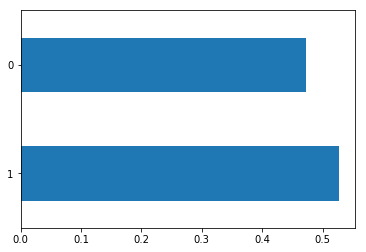

In [10]:
# Баланс классов
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
a.plot.barh(stacked=True);

In [11]:
## Количество уникальных значений в колонках типа "object"
menu = {}
def unique_vals(df):
    #menu = {}
    df = df[df.dtypes[(df.dtypes.map(str).isin(['object'])== True)].index]
    for cols in df.columns:
        menu[cols] = len(df[cols].unique().tolist())
        
unique_vals(df2)   
s  = pd.Series(menu,index=menu.keys())
s

credit_bank_name               65
market_key                     86
dw_status_key                   3
segment_key                    28
segment_desc                   28
subs_activation_date_key     5038
price_plan_key_eop           2236
price_plan_desc              2011
pp_group_eop                   64
channel_key                  9891
price_plan_desc_act          3958
pp_group_desc_eop              44
archetype_eop                  23
segment_type                    4
super_region_name               6
cust_fullname               18791
customer_birth_date         10282
curr_subs_status_key            4
archetype_act                  24
pp_group_act                  118
price_plan_key_act           4263
dealer_code                  4060
dealer_group_desc              26
memo_type                      50
pp_group_desc_act              98
name_device                  2024
class_device                    5
brand                          27
type_device                     7
change_pp_date

## Time preprocessing

In [12]:
## Обработка колонок времени
import numpy as np

def time_preproc(df, date_cols):
    
    
    for x in date_cols:
        #df[x].replace("\N", np.nan, inplace=True)
        df[x] = pd.to_datetime(df[x])
        
    return df

In [13]:
cols_to_drop = ['subs_key', 'ban_key', 'first_ctn', 'first_ban', 'month', 'customer_birth_date', 'cust_fullname']
df2.drop(cols_to_drop, axis=1, inplace = True)

In [14]:
df2.change_pp_date.fillna(0, inplace =True)
df2.subs_activation_date_key.fillna(0, inplace=True)

In [15]:
date_columns = ['subs_activation_date_key', 'change_pp_date']
df2 = time_preproc(df2,date_columns )

In [16]:
### месяц , тип объект
df2['change_pp_date_mon']=''
df2['change_pp_date_mon'] = df2['change_pp_date'].map(lambda x: x.strftime("%m")).astype(float)
df2['subs_activation_date_key_mon']=''
df2['subs_activation_date_key_mon'] = df2['subs_activation_date_key'].map(lambda x: x.strftime("%m")).astype(float)

In [17]:
### год , тип объект
df2['change_pp_date_year']=''
df2['change_pp_date_year'] = df2['change_pp_date'].map(lambda x: x.strftime("%Y")).astype(float)
df2['subs_activation_date_key_year']=''
df2['subs_activation_date_key_year'] = df2['subs_activation_date_key'].map(lambda x: x.strftime("%Y")).astype(float)

In [18]:
df2['change_pp_date_year -subs_activation_date_key_year'] = df2['change_pp_date_year'] -df2['subs_activation_date_key_year']

In [19]:
dates = ['change_pp_date', 'subs_activation_date_key']
df2.drop(dates, axis=1, inplace=True)

In [20]:
from datetime import datetime 
def get_date(s):
    d = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8])).date()
    return d

In [21]:
df2.loc[df2['app_activation_date'].notnull(), 'app_activation_date'] = df2.loc[df2['app_activation_date'].notnull(), 'app_activation_date'].astype(int).astype(str).apply(lambda x: get_date(x))

In [22]:
df2.loc[df2['max_day'].notnull(), 'max_day'] = df2.loc[df2['max_day'].notnull(), 'max_day'].astype(int).astype(str).apply(lambda x: get_date(x))

In [23]:
date_columns =['max_day', 'app_activation_date']
df2 = time_preproc(df2,date_columns )

In [24]:
df2.max_day.fillna(0, inplace =True)
df2.app_activation_date.fillna(0, inplace=True)

In [25]:
### месяц , тип объект
df2['max_day_mon']=''
df2['max_day_mon'] = df2['max_day'].map(lambda x: x.strftime("%m")).astype(float)
df2['app_activation_date_mon']=''
df2['app_activation_date_mon'] = df2['app_activation_date'].map(lambda x: x.strftime("%m")).astype(float)

In [26]:
### год , тип объект
df2['max_day_year']=''
df2['max_day_year'] = df2['max_day'].map(lambda x: x.strftime("%Y")).astype(float)
df2['app_activation_date_year']=''
df2['app_activation_date_year'] = df2['app_activation_date'].map(lambda x: x.strftime("%Y")).astype(float)

In [27]:
dates = ['max_day', 'app_activation_date']
df2.drop(dates, axis=1, inplace=True)

In [28]:
df2.dtypes[df2.dtypes.map(str).isin(['datetime64[ns]']) == True].index

Index([], dtype='object')

## Geo preprocessing

In [29]:
## Формула для расчета дистанции между двумя координатами( в километрах)

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):

    # convert decimal degrees to radians 
    lon1 = lon1.map(radians)
    lon2 = lon2.map(radians)
    lat1 = lat1.map(radians)
    lat2 = lat2.map(radians)
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = dlat.map(lambda x: sin(x/2)**2)+ lat1.map(lambda x: cos(x))*lat2.map(lambda x: cos(x))* dlon.map(lambda x: sin(x/2)**2)
    c = a.map(lambda x: 2 * asin(sqrt(x))) 
    km = c.map(lambda x: 6367 * x)
    return km

In [30]:
df2['distance'] = haversine(df2.subs_longitude_home, df2.subs_latitude_home, df2.subs_longitude_work, df2.subs_latitude_work)

In [32]:
df2.dtypes[df2.dtypes.map(str).isin(['object'])]

credit_bank_name           object
market_key                 object
dw_status_key              object
segment_key                object
segment_desc               object
price_plan_key_eop         object
price_plan_desc            object
pp_group_eop               object
channel_key                object
price_plan_desc_act        object
pp_group_desc_eop          object
archetype_eop              object
segment_type               object
super_region_name          object
curr_subs_status_key       object
archetype_act              object
pp_group_act               object
price_plan_key_act         object
dealer_code                object
dealer_group_desc          object
memo_type                  object
pp_group_desc_act          object
name_device                object
class_device               object
brand                      object
type_device                object
recharge_source_1m         object
recharge_source_6m         object
int_state_6m               object
payment_method

In [33]:
df2.subs_work_ind.dtype

dtype('O')

## Label encoding of categorical features

In [34]:
## Кодирование значений
def catEncoder(series, nCats=0):
    ## Количество значений, которые необходимо закодировать-это такие уникальные значения, процент встречаемости которых >2%, 
    ## не считая самого популярного значения
    
    nCats = series.value_counts()[(series.value_counts()/(series.value_counts().sum() -
                                  series.value_counts()[0]-series.value_counts()[1])> 0.002)].shape[0]
    return dict([(x, i) for i, x in enumerate(series.value_counts().index[:nCats])])

In [35]:
def readEncodTables(df, isTrain=True, encodersDict=None):
    
    
    for col in df.select_dtypes(include=['object']).columns:
        if 'NOT_IND' in df[col].value_counts():
#            print(col)
            df[col] = df[col].replace('NOT_IND', np.nan).astype(float)

    
    if not encodersDict:

        encoders = dict()
        for key in df.dtypes[df.dtypes.map(str).isin(['int', 'float', 'bool', 'int64', 'float64','datetime64[ns]']) == False].index:
            
            encoders[key] = catEncoder(df[key], 0)
    else:

        encoders = encodersDict
        
    
    for key in encoders:
        df[key] = df[key].fillna('Nodata')
        df[key] = df[key].map(encoders[key])
        df[key] = df[key].fillna(-1)
        
    
    return df, encoders

In [36]:
df2, encoders = readEncodTables(df2)

In [37]:
df3 = df2.fillna(0)

## Correlations

In [38]:
CorrKoef = df3.corr()
CorField985 = []
print ('----- 2.1 Correlations')
print ('TOP > .985')
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.985]:
        if i != j and j not in CorField985 and i not in CorField985:
            CorField985.append(j)
            print ("%s-->%s: r^2=%f" % (i,j, CorrKoef[i][CorrKoef.index==j].values[0]))

print ('CorField985', len(CorField985))

----- 2.1 Correlations
TOP > .985
collect_3day-->collect_7day: r^2=1.000000
segment_key-->segment_desc: r^2=1.000000
ctn_person_subs_1m-->ctn_person_subs_6m: r^2=0.999866
recharge_1m-->sum_balance_total_m: r^2=1.000000
arpu_total_avg_hy-->arpu_wo_roam_avg_hy: r^2=0.986472
onn_roam_out_time_avg_6m-->onn_roam_out_time_6m: r^2=0.993745
onn_roam_in_time_avg_6m-->onn_roam_in_time_6m: r^2=0.997215
cnt_onn_roam_in_call_6m-->cnt_onn_r_in_call_avg_6m: r^2=0.994674
cnt_onn_roam_out_call_6m-->cnt_onn_r_out_call_avg_6m: r^2=0.987665
bal_charge_avg_6m-->bal_charge_ind_6m: r^2=1.000000
cnt_subs_on_imei_1m-->cnt_subs_on_imei_6m: r^2=0.998635
unic_onn_ctn_avg_hy-->unic_onn_ctn_avg_13m: r^2=0.987910
unic_comp_ctn_avg_hy-->unic_comp_ctn_avg_13m: r^2=0.985321
unic_ctn_avg_hy-->unic_ctn_avg_13m: r^2=0.985831
CorField985 14


In [39]:
df3 = df3.drop(CorField985, 1)

## Modelling with holdout samples

In [161]:
X = df3.drop(['subs_key_tcs', 'target_flag'], axis=1)
y =df3.target_flag

In [162]:
cols= ['subs_activation_date_key_year', 'pay_charge_ind_1m',
       'cnt_block_6m', 'pay_charge_avg_6m', 'life_time',
       'pay_charge_ind_6m', 'app_activation_date_year',
       'change_pp_date_year -subs_activation_date_key_year',
       'cnt_imei_on_subs_6m', 'cnt_block_1m', 'sms_comp_num_m',
       'cnt_sms_all_in_1m', 'minus_bal_day_avg_hy',
       'unic_ctn_cpa_avg_hy', 'segment_key', 'avg_lifetime_ctn_in_group',
       'avg_lifetime_ctn_out_grp', 'unic_ctn_cpa_1m',
       'cnt_sms_all_in_avg_6m', 'data_volume_avg_6m', 'arpu_vas_13m',
       'cnt_imei_on_subs_1m', 'unic_scom_avg_lt_ctn_all',
       'sms_comp_num_avg_hy', 'arpu_vas_m', 'recharge_avg_6m',
       'data_volume_1m', 'arpu_ctn_out_grp_avg_m', 'arpu_vas_avg_hy',
       'avg_lifetime_ctn_grp_old', 'minus_bal_day_avg_1m',
       'unic_subs_comm_avg_lt', 'arpu_ctn_in_grp_avg_m', 'arpu_wo_roam_m',
       'sms_out_comp_num_avg_6m', 'called_ctn_out_group',
       'arpu_ctn_grp_old_1m', 'voice_out_fix_dur_avg_6m',
       'pp_group_desc_act']

In [58]:
pd.DataFrame( cols).to_csv('top_features.csv', sep = '\t', index= False)

In [163]:
X= X[cols]
y =df3.target_flag

In [164]:
X.shape

(33260, 39)

In [165]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

23282 9978


In [166]:
import xgboost as xgb

In [167]:
%pylab inline

from sklearn import ensemble, cross_validation, learning_curve, metrics 

xgb_classifier = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.2, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=8, missing=None, n_estimators=500, nthread=-1,
       objective='reg:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=130, silent=True, subsample=0.5)

Populating the interactive namespace from numpy and matplotlib


In [168]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.2, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=8, missing=None, n_estimators=500, nthread=-1,
       objective='reg:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=130, silent=True, subsample=0.5)

In [169]:
# feature importance
from xgboost import plot_importance
from matplotlib import pyplot

#print(xgb_classifier.feature_importances_)
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

my_plot_importance(xgb_classifier,  figsize=(10,20))

In [170]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

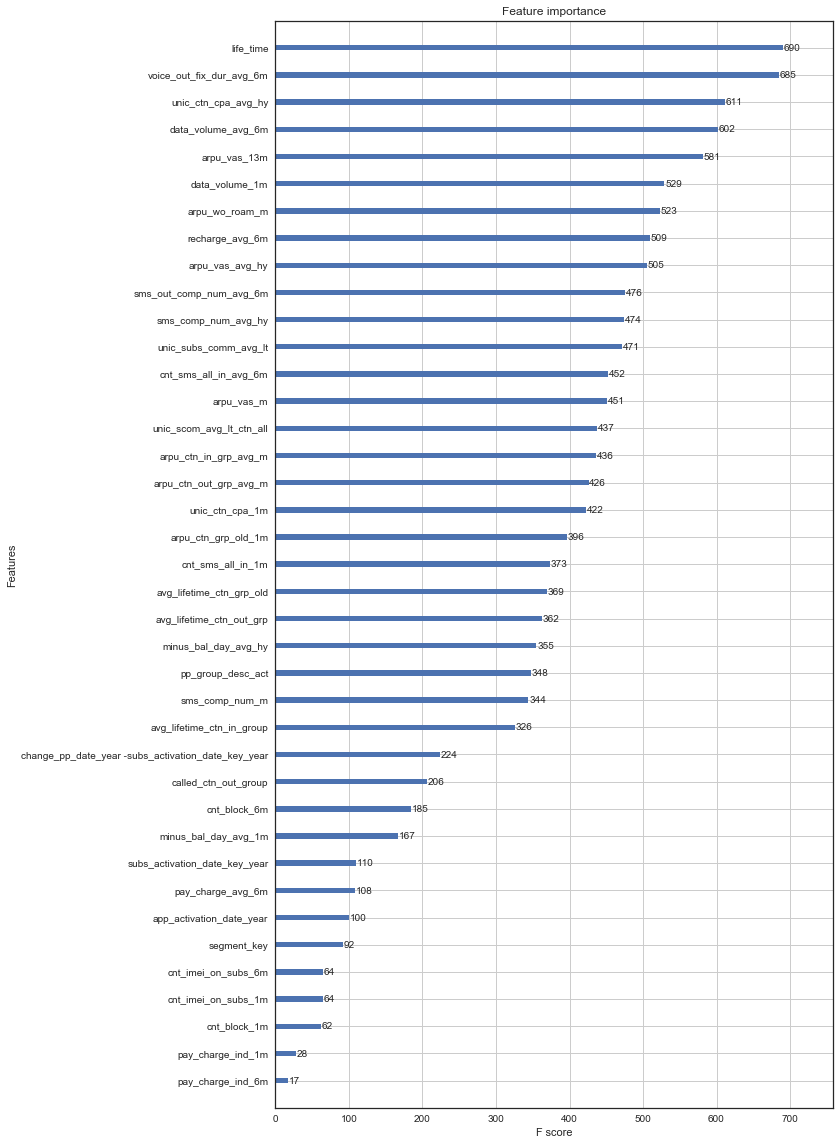

In [171]:

# plot feature importance
#plt.figure(figsize=(5,5))
my_plot_importance(xgb_classifier,  figsize=(10,20))

In [51]:
gini 0.569747163355
gini 0.577621674526
gini 0.592652945479

SyntaxError: invalid syntax (<ipython-input-51-b820c37f7323>, line 1)

In [188]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,xgb_classifier.predict_proba(X_test)[:,1] )
print('gini', 2*roc -1)

gini 0.549905603877


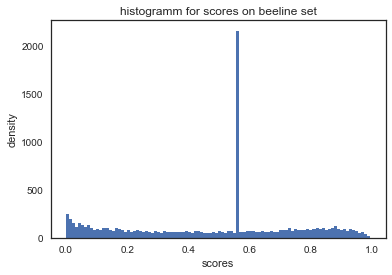

In [222]:
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
a= xgb_classifier.predict_proba(X_test)[:,1]
%matplotlib inline  
np.histogram(a.tolist(), bins=100)
plt.hist(a, bins=100)
plt.xlabel('scores')
plt.ylabel('density')
plt.title('histogramm for scores on beeline set')

In [211]:
y_train.sum()/y_train.shape[0]

0.4827334421441457

In [212]:
y_test.sum()/y_test.shape[0]

0.4847664862697936

In [216]:
import numpy as np

aa =np.sort(all_pred.prob.unique())

In [225]:
len(all_pred['prob'].unique())

7275

In [267]:
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_true = all_pred['true']
recall = []
precision = []
score = []
fscore= []

#aa =np.sort(table.pred.unique())
aa = np.sort(all_pred['prob'].unique())
for i in range(0, len(aa), 400):
    f = lambda x: 1 if x >aa[i] else 0
    score.append(aa[i])
    y_pred = all_pred['prob'].map(f)
    g=recall_score(y_true, y_pred, average='binary')
    recall.append(g)
    p = precision_score(y_true, y_pred, average='binary')
    precision.append(p)
    f =f1_score(y_true, y_pred, average='macro')
    fscore.append(f)
    

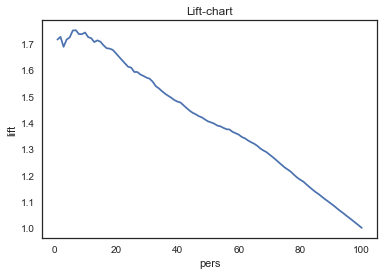

In [268]:
plt.plot(pers, lift)
plt.xlabel('pers')
plt.ylabel('lift')
plt.title('Lift-chart')

## Statistics

In [173]:
import pandas as pd
import scipy
import sklearn
%matplotlib inline
import pandas as pd
import numpy as np
import os

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.cross_validation import KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc

In [174]:
def plot_curves(fpr, tpr, precision, recall):

    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: AUC={0:0.3f}'.format(auc(recall, precision)))

    plt.subplot(122)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: : AUC=%0.3f' % auc(fpr, tpr))
    plt.show()

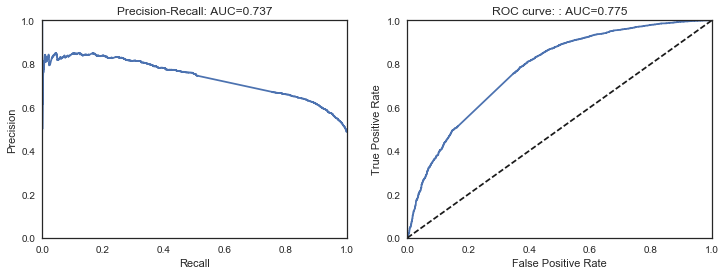

In [177]:
pred =xgb_classifier.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_curves(fpr, tpr, precision, recall)

# Lift

In [178]:
all_pred = pd.DataFrame(np.vstack([y_test, pred])).T

In [179]:
all_pred.columns = ['true', 'prob']
all_pred.sort('prob', ascending=False, inplace=True)

In [180]:
round(np.shape(all_pred)[0]*10/100)

998

In [183]:
pers, gain, lift = [], [], []

for i in range(100):
    i+=1
    pers.append(i)
    n=round(np.shape(all_pred)[0]*i/100)
    g=sum(all_pred['true'].head(n))
    gain.append(g)
    g_base = sum(all_pred['true']) *i/100 
    lift.append(g / g_base)

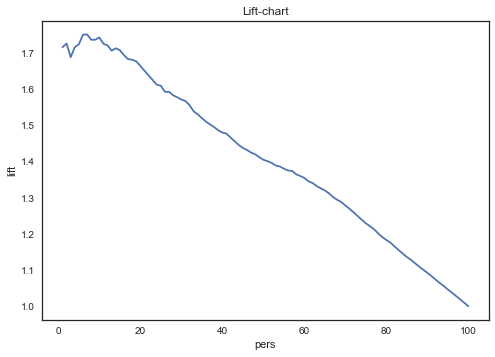

In [184]:
plt.plot(pers, lift)
plt.xlabel('pers')
plt.ylabel('lift')
plt.title('Lift-chart')

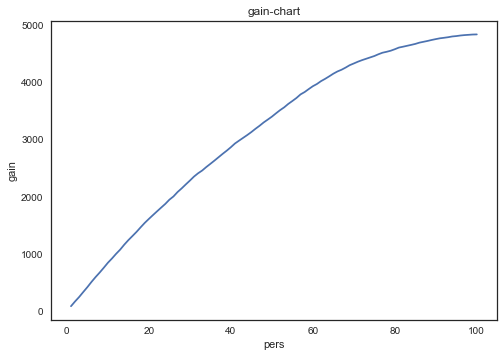

In [185]:
plt.plot(pers, gain)
plt.xlabel('pers')
plt.ylabel('gain')
plt.title('gain-chart')

## Parameter's tuning

In [52]:
model = xgb.XGBClassifier()

In [136]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>

In [137]:
param_list = {'n_estimators' : [300, 500, 700, 1000], 
              'gamma':[i/10.0 for i in range(0,5)],
              'min_child_weight': [8, 10, 12],
              'reg_alpha': [0],
              'learning_rate': [0.05, 0.15],
              'objective': ["reg:logistic"],
              "max_depth": [6],
              "subsample": [0.7],
              "colsample_bytree": [0.6],
              'seed': [130]
             }

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_list, n_iter=10, scoring='roc_auc')
rsearch.fit(X, y)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [300, 500, 700, 1000], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'min_child_weight': [8, 10, 12], 'reg_alpha': [0], 'learning_rate': [0.05, 0.15], 'objective': ['reg:logistic'], 'max_depth': [6], 'subsample': [0.7], 'colsample_bytree': [0.6], 'seed': [130]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)
0.775642632141


In [140]:
print(rsearch.best_estimator_)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.2, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=8, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=130, silent=True, subsample=0.7)


## Cross validation and learning curves

In [71]:
%pylab inline

from sklearn import ensemble, cross_validation, learning_curve, metrics 

xgb_classifier = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.2, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=8, missing=None, n_estimators=500, nthread=-1,
       objective='reg:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=130, silent=True, subsample=0.5)

train_sizes, train_scores, test_scores = learning_curve.learning_curve(xgb_classifier, X, y, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='roc_auc')

Populating the interactive namespace from numpy and matplotlib


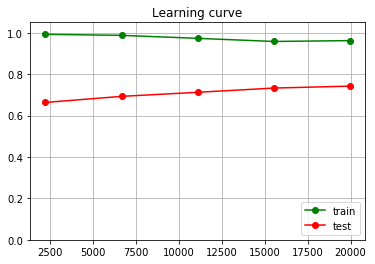

In [72]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.title("Learning curve")
pylab.legend(loc='lower right')

In [81]:
xgb_classifier = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.2, learning_rate=0.15, max_delta_step=0, max_depth=6,
       min_child_weight=8, missing=None, n_estimators=500, nthread=-1,
       objective='reg:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=130, silent=True, subsample=0.5)

In [82]:
from sklearn.model_selection import cross_val_score

score =cross_val_score(xgb_classifier, X, y,  scoring = 'roc_auc', cv = 5)    


In [83]:
print('cross_validation gini score on 3 folds equal to ={} \ngini mean on 3 folds equal to =  {}'.format(2*score-1, 2*score.mean()-1))

cross_validation gini score on 3 folds equal to =[ 0.4965701   0.45700059  0.49715334  0.41876053  0.53705935] 
gini mean on 3 folds equal to =  0.48130878242248554


In [ ]:
encoder

## Random Forest

In [152]:

from sklearn.metrics import roc_auc_score
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=500,criterion='gini',max_depth= 8, min_samples_leaf = 1000, random_state=7, n_jobs=-1,class_weight=None)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1000,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [153]:

from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1] )
print('gini', 2*roc -1)

gini 0.393750002262


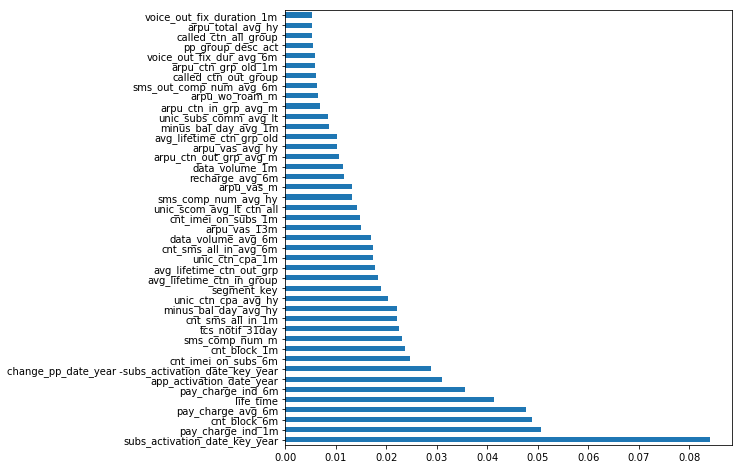

In [231]:

plt.figure(figsize=(8,8))
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(43).plot(kind='barh')

In [232]:
cols =pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(40).index.values

In [234]:
pd.DataFrame(cols)

,0
0,subs_activation_date_key_year
1,pay_charge_ind_1m
2,cnt_block_6m
3,pay_charge_avg_6m
4,life_time
5,pay_charge_ind_6m
6,app_activation_date_year
7,change_pp_date_year -subs_activation_date_key_...
8,cnt_imei_on_subs_6m
9,cnt_block_1m


In [215]:
X= df3[cols]

In [216]:
y = df3.target_flag

In [217]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

23282 9978


In [218]:

from sklearn.metrics import roc_auc_score
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=500,criterion='gini',max_depth= 8, min_samples_leaf = 1000, random_state=7, n_jobs=-1,class_weight=None)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1000,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [219]:

from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1] )
print('gini', 2*roc -1)

gini 0.416537134309


In [ ]:
pd.